<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84/prob_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

In [ ]:
import math
import random

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import bernoulli, binom, multinomial, norm

# 1차원 데이터

## 평균

In [ ]:
X = np.array([45, 26, 57, 67, 40, 30, 55, 60, 95, 500])

# 공식대로 구하기
print(X.sum()/len(X))

# numpy 기능으로 바로 구하기
print(X.mean())

97.5
97.5


In [ ]:
# 이상치에 영향을 많이 받음
print(X[:-1].mean())

52.77777777777778


## 중앙값

In [ ]:
# 이상치에 영향 별로 없음
np.median(X)

56.0

In [ ]:
# 크기 순을 정렬해서 가운데 있는 값
# 데이터 개수가 짝수면 가운데 두값의 평균
X.sort()
X

array([ 26,  30,  40,  45,  55,  57,  60,  67,  95, 500])

## 분산

- score1과 score2는 평균이 똑같음

In [ ]:
np.random.seed(0)
scores1 = np.random.randint(30, 100, 10)
print(scores1)
print(scores1.mean())

[74 77 94 97 97 39 51 66 42 88]
72.5


In [ ]:
scores2 = np.random.randint(50, 90, 10)
print(scores2)
print(scores2.mean())

[51 88 89 73 74 67 87 75 63 58]
72.5


- 각 데이터에서 평균과의 차이를 구하고 이를 막대그래프로 표현

In [ ]:
deviations1 = scores1 - scores1.mean()
deviations1

array([  1.5,   4.5,  21.5,  24.5,  24.5, -33.5, -21.5,  -6.5, -30.5,
        15.5])

In [ ]:
deviations2 = scores2 - scores2.mean()
deviations2

array([-21.5,  15.5,  16.5,   0.5,   1.5,  -5.5,  14.5,   2.5,  -9.5,
       -14.5])

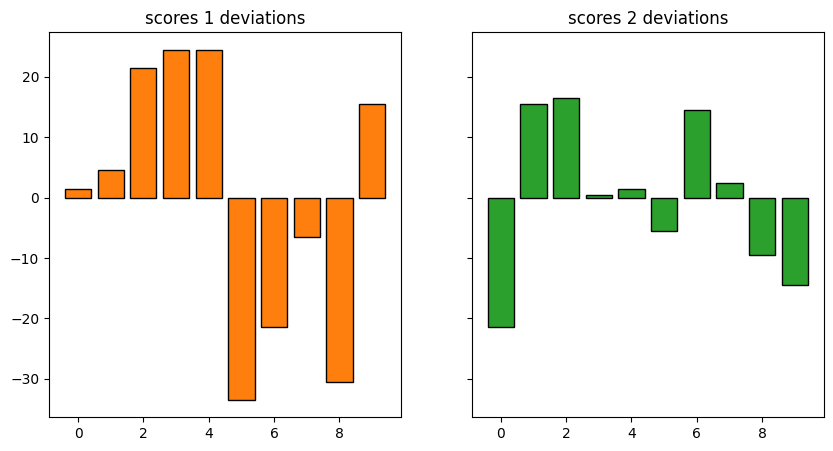

In [ ]:
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharey=True)

ax[0].bar(np.arange(10), deviations1, color='C1', edgecolor='k')
ax[0].set_title('scores 1 deviations')
ax[1].bar(np.arange(10), deviations2, color='C2', edgecolor='k')
ax[1].set_title('scores 2 deviations')
plt.show()

- 이 평균과의 차이값들을 평균해보면 0이 됨

In [ ]:
print(deviations1.sum() / len(deviations1))
print(deviations2.sum() / len(deviations2))

0.0
0.0


$$
\begin{aligned}
\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x}) &= \frac{1}{n} \sum_{i=1}^n \left( x_i - \frac{1}{n} \sum_{i=1}^n x_i \right) \\
&=\frac{1}{n} \left\{ \sum_{i=1}^n x_i - \sum_{i=1}^n \left(\frac{1}{n} \sum_{i=1}^n x_i \right) \right\}\\
&= \frac{1}{n} \left( \sum_{i=1}^n x_i - n\bar{x} \right) \\
&= \frac{1}{n} \sum_{i=1}^n x_i - \bar{x}  = 0
\end{aligned}
$$

- 그래서 제곱하여 평균을 냄

In [ ]:
# 편차 제곱의 평균[+]
print((deviations1**2).mean())
print((deviations2**2).mean())

# numpy 기능으로 분산 바로 구하기 [+]
# ddof=0 이 디폴트, 즉 N으로 나눔
print(scores1.var())
print(scores2.var())

448.25
152.45
448.25
152.45


- 분산은 평균과의 편차값을 한변으로 하는 정사각형들의 평균 넓이

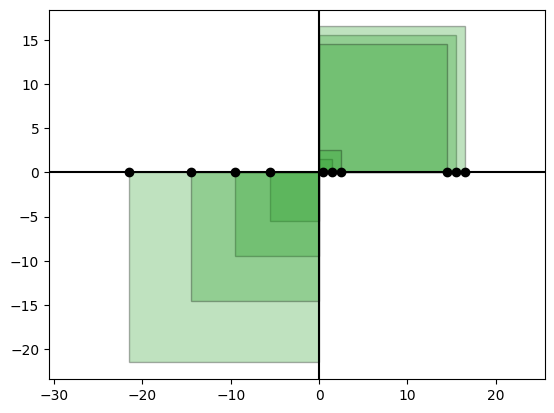

In [ ]:
from matplotlib.patches import Rectangle

fig = plt.figure(dpi=100)
ax = plt.axes()

#          0:-   1:+
colors = ['C1', 'C2']

covs = [ Rectangle( (0,0), x, x, edgecolor='k',
                   facecolor=colors[1], alpha=0.3)
            for x in deviations2 ]

for cov in covs:
    ax.add_patch(cov)

ax.plot(deviations2, np.zeros_like(deviations2), 'o', color='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis('equal')
plt.show()

## 표준편차

- 분산이 제곱되어 구해진 값이므로 제곱근을 구해서 원래 데이터와 비슷한 지표로 만든 값

In [ ]:
# # 편차 제곱 평균의 양의 제곱근
print(np.sqrt((deviations1**2).mean()))
print(np.sqrt((deviations2**2).mean()))

# numpy 기능으로 표준편차 바로 구하기 [+]
print(scores1.std())
print(scores2.std())

21.17191535974013
12.34706442843804
21.17191535974013
12.34706442843804


### 표준편차를 사용한 이상치 탐지anomaly detection: 3 sigma rule

- 정의

- 경험적 규칙(empirical rule)
- 표준편차의 3배인 3*Sigma(σ)의 범위가 전체 Data의 99.7%를 포함
- UCL(Upper Control Limit) = mu + 3*sigma
- LCL(Lower Control Limit) = mu - 3*sigma

- 장단점
  - 구현과 이해가 쉽고 명확한 기준 설정 가능
  - 정규분포 가정 필요
  - 다변수 데이터에는 하나의 변수에 각각 적용해야 하므로 피쳐간 상호관계를 파악하기 어려움
  


In [ ]:
!gdown 1DAi1LRchE2xCb4zROLcwYTWQQ2BUiRv3

Downloading...
From: https://drive.google.com/uc?id=1DAi1LRchE2xCb4zROLcwYTWQQ2BUiRv3
To: /content/nba.csv
100% 1.84M/1.84M [00:00<00:00, 175MB/s]


In [ ]:
nba_df = pd.read_csv('nba.csv', index_col=0)

nba_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [ ]:
nba_df = nba_df[nba_df['season'] == '2021-22']
nba_df = nba_df[['player_name', 'player_height', 'player_weight']].reset_index(drop=True)

nba_df.head()

,player_name,player_height,player_weight
0,Freddie Gillespie,205.74,111.130040
1,Georges Niang,200.66,104.326160
2,George King,198.12,99.790240
3,George Hill,193.04,85.275296
4,Gary Trent Jr.,195.58,94.800728


In [ ]:
height_mean = nba_df['player_height'].mean()
height_std = nba_df['player_height'].std()

In [ ]:
# UCL, LCL 생성
ucl = height_mean + 3*height_std
lcl = height_mean - 3*height_std

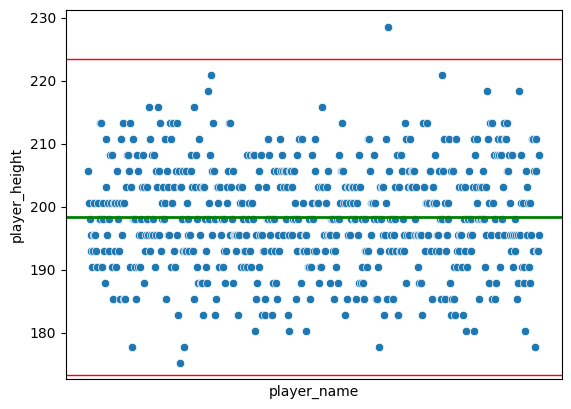

In [ ]:
sns.scatterplot(x=nba_df['player_name'], y=nba_df['player_height'])

plt.axhline(y=height_mean, color='g', linewidth=2)
plt.axhline(y=ucl, color='r', linewidth=1)
plt.axhline(y=lcl, color='r', linewidth=1)
plt.xticks([])

plt.show()

## 1차원 데이터의 시각화

### 히스토그램

In [ ]:
np.random.seed(0)
scores = np.abs((np.random.randn(500)*13)-65).astype(int)
scores[scores>=100] = 100
scores

array([ 42,  59,  52,  35,  40,  77,  52,  66,  66,  59,  63,  46,  55,
        63,  59,  60,  45,  67,  60,  76,  98,  56,  53,  74,  35,  83,
        64,  67,  45,  45,  62,  60,  76,  90,  69,  62,  49,  49,  70,
        68,  78,  83,  87,  39,  71,  70,  81,  54,  85,  67,  76,  59,
        71,  80,  65,  59,  64,  61,  73,  69,  73,  69,  75,  87,  62,
        70,  86,  58,  76,  64,  55,  63,  50,  81,  59,  73,  76,  72,
        69,  64,  80,  53,  58,  84,  45,  40,  49,  67,  78,  51,  70,
        49,  62,  52,  60,  55,  64,  41,  63,  59,  40,  82,  81,  52,
        80,  39,  70,  74,  40,  45,  40,  53,  76,  40,  68,  54,  52,
        67,  57,  53,  60,  79,  61,  47,  74,  66,  70,  40,  56,  59,
        75,  57,  73,  64,  73,  56,  57,  67,  59,  79,  84,  59,  62,
        56,  34,  52,  76,  50,  82,  71,  65,  42,  74,  75,  66,  73,
        50,  79,  79,  70,  71,  39,  52,  63,  80,  54,  78,  85,  49,
        60,  53,  60,  53,  73,  78,  56,  75,  73,  70,  64,  6

In [ ]:
# 히스토그램[+]
hist, bins = np.histogram(scores, bins=10, range=(0,100))
hist, bins

(array([  0,   0,   1,  14,  40, 116, 141, 123,  50,  15]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

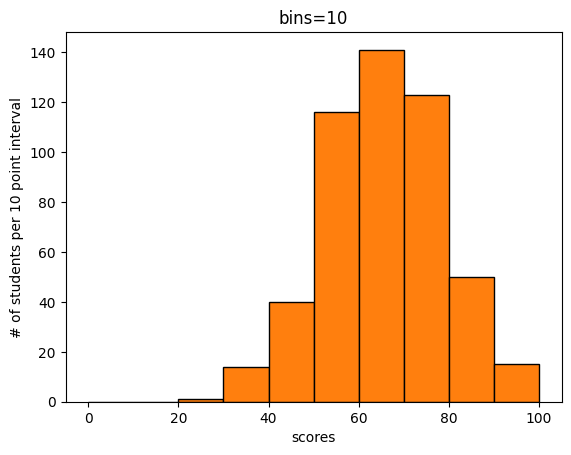

In [ ]:
# matplotlib
fig = plt.figure()
ax = plt.axes()

ax.hist(scores, bins=10, range=(0,100), color='C1', edgecolor='k')
ax.set_xlabel('scores')
ax.set_ylabel('# of students per 10 point interval')
ax.set_title('bins=10')
plt.show()

- 구간을 더 촘촘히 해서 그리면

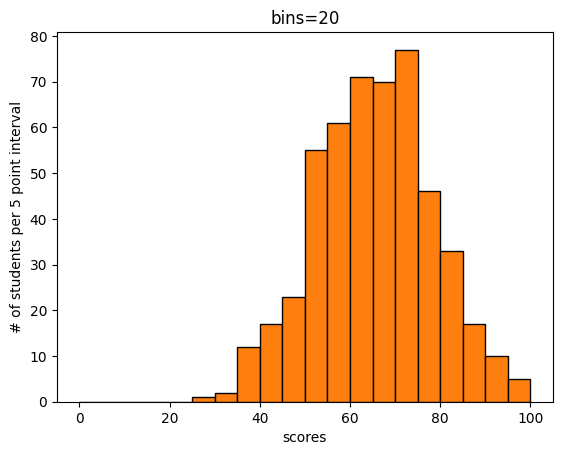

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.hist(scores, bins=20, range=(0,100), color='C1', edgecolor='k')
ax.set_title('bins=20')
ax.set_xlabel('scores')
ax.set_ylabel('# of students per 5 point interval')
plt.show()

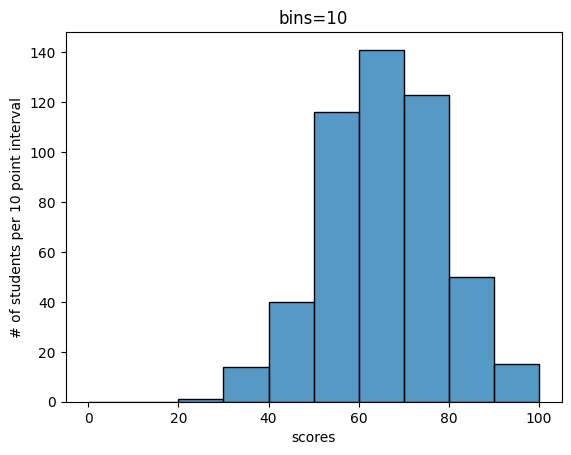

In [ ]:
# import seaborn as sns
sns.histplot(data=scores, bins=10, binrange=(0,100))
plt.title('bins=10')
plt.xlabel('scores')
plt.ylabel('# of students per 10 point interval')
plt.show()

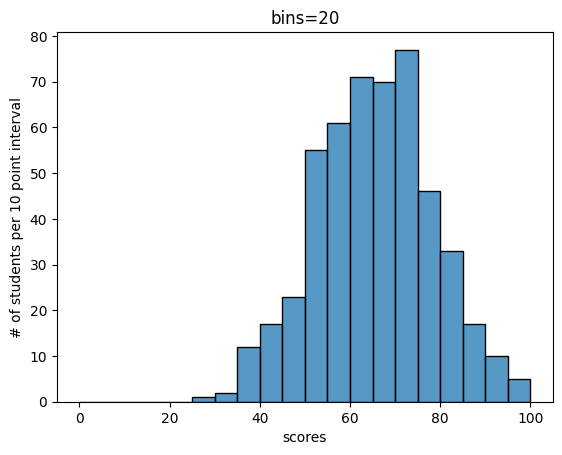

In [ ]:
# seaborn
sns.histplot(data=scores, bins=20, binrange=(0,100))
plt.title('bins=20')
plt.xlabel('scores')
plt.ylabel('# of students per 10 point interval')
plt.show()

### 상자그림

In [ ]:
D = np.array([1,2,3,4,5,6,7,8,9,10])

# 이 데이터는 이상치 존재
D = np.array([2,3,4,5,6,7,8,9,10,18,20])

- 전체 데이터에서 25%, 50%, 75%에 위치하는 값을 Q1, Q2, Q3으로 구함

- 이산 데이터를 줄세우고 25% 위치에 해당하는 값을 구할 때 깔끔하게 정수로 떨어지지 않게 되므로 `interpolation`이란 옵션으로 적당한 값을 선정

In [ ]:
Q1 = np.percentile(D, 25)
Q2 = np.percentile(D, 50)
Q3 = np.percentile(D, 75)

print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}")

Q1=4.5, Q2=7.0, Q3=9.5


In [ ]:
# Q3과 Q1의 차이
IQR = Q3 - Q1
IQR

5.0

- 식 Q3 + 1.5*IQR 로 가상의 상위 울타리upper fence를 계산하고 그 펜스를 넘어가지 않는 데이터의 최대값을 찾음

In [ ]:
upper_fence = Q3 + 1.5*IQR
print(upper_fence)

upper_whisker = np.max(D[D <= upper_fence])
print(upper_whisker)

17.0
10


- Q1 - 1.5*IQR로 가상의 하위 울타리lower fence를 계산하고 그 펜스를 넘어가지 않는 데이터의 최소값을 찾음

In [ ]:
lower_fence = Q1 - 1.5*IQR
print(lower_fence)

lower_whisker = np.min(D[D >= lower_fence])
print(lower_whisker)

-3.0
2


- matplotlib에서 상자그림을 그림

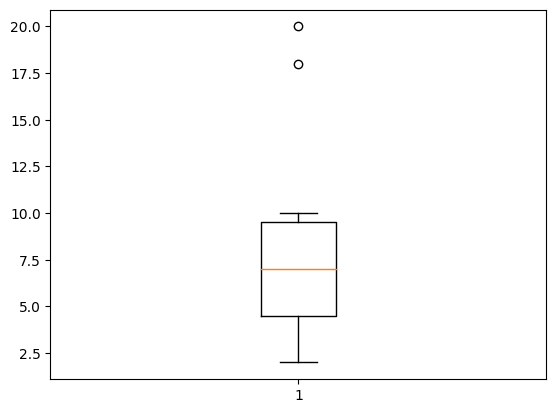

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

box = ax.boxplot(D)

plt.show()

- 그려진 상자그림에서 계산된 값들이 미리 계산한 값들과 일치하는가?

In [ ]:
# 위 그림에서 whisker, box의 실제 변이 그려진 좌표를 조사
print("upper whisker", box['caps'][1].get_xydata()[0,1])
print("Q3", box['boxes'][0].get_xydata()[2,1])
print("Q2", box['medians'][0].get_xydata()[0,1])
print("Q1", box['boxes'][0].get_xydata()[0,1])
print("lower whisker", box['caps'][0].get_xydata()[0,1])

upper whisker 10.0
Q3 9.5
Q2 7.0
Q1 4.5
lower whisker 2.0


In [ ]:
# 이상치
box['fliers'][0].get_ydata()

array([18, 20])

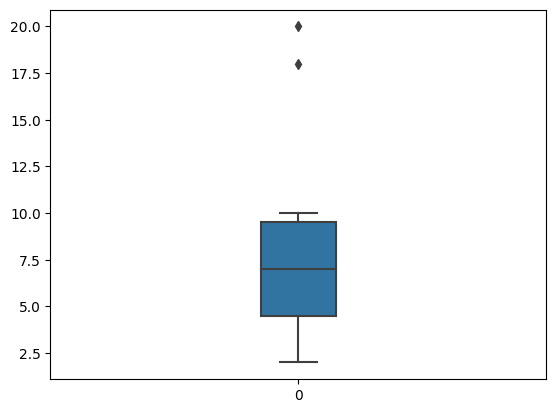

In [ ]:
# seaborn
sns.boxplot(data=D, width=0.15)
plt.show()

#### 상자 그림을 이용한 이상치 탐지

In [ ]:
nba_df.head()

,player_name,player_height,player_weight
0,Freddie Gillespie,205.74,111.130040
1,Georges Niang,200.66,104.326160
2,George King,198.12,99.790240
3,George Hill,193.04,85.275296
4,Gary Trent Jr.,195.58,94.800728


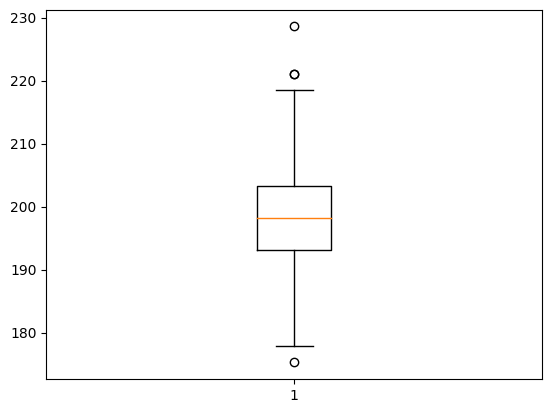

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

box = ax.boxplot(nba_df['player_height'])
plt.show()

In [ ]:
# 위 그림에서 whisker, box의 실제 변이 그려진 좌표를 조사
print("upper whisker", box['caps'][1].get_xydata()[0,1])
print("Q3", box['boxes'][0].get_xydata()[2,1])
print("Q2", box['medians'][0].get_xydata()[0,1])
print("Q1", box['boxes'][0].get_xydata()[0,1])
print("lower whisker", box['caps'][0].get_xydata()[0,1])

upper whisker 218.44
Q3 203.2
Q2 198.12
Q1 193.04
lower whisker 177.8


In [ ]:
upper_whisker = box['caps'][1].get_xydata()[0,1]
lower_whisker = box['caps'][0].get_xydata()[0,1]

upper_outliers = []
lower_outliers = []

for outlier in box['fliers'][0].get_ydata():
    if outlier > upper_whisker:
        upper_outliers.append(outlier)
    else:
        lower_outliers.append(outlier)


print(upper_outliers)
print(lower_outliers)

[220.98, 228.6, 220.98]
[175.26]


# 2차원 데이터

In [ ]:
# 키
H = np.array([170, 155, 175, 182, 171, 188, 165, 167, 175, 183])
# 몸무게
W = np.array([ 65,  59,  68,  78,  62,  85,  63,  58,  70,  98])

# 신체 정보
X = np.array([H, W])
X

array([[170, 155, 175, 182, 171, 188, 165, 167, 175, 183],
       [ 65,  59,  68,  78,  62,  85,  63,  58,  70,  98]])

- 다차원 데이터의 행렬은 항상 (N, D)

In [ ]:
X = X.T
X

array([[170,  65],
       [155,  59],
       [175,  68],
       [182,  78],
       [171,  62],
       [188,  85],
       [165,  63],
       [167,  58],
       [175,  70],
       [183,  98]])

## 평균과 분산

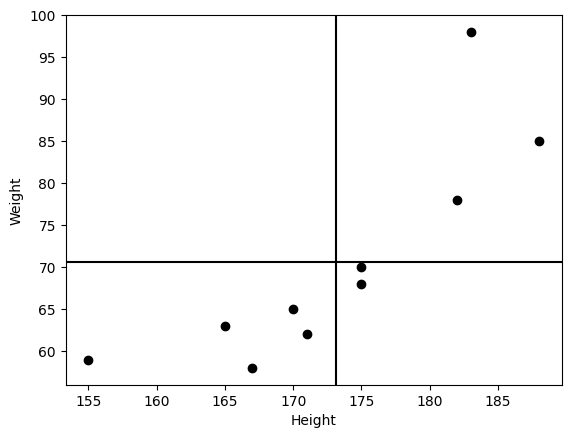

In [ ]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X[:,0], X[:,1], 'o', color='k')

# 두 데이터의 평균선 그림
ax.axhline(y=X[:,1].mean(), color='k')
ax.axvline(x=X[:,0].mean(), color='k')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.show()

- 앞서 알아본 통계값인 평균, 분산은 각 데이터 마다 계산 가능

In [ ]:
print("키 평균: ", X[:,0].mean())
print("몸무게 평균: ", X[:,1].mean())

print("키 분산: ", X[:,0].var())
print("몸무게 분산: ", X[:,1].var())

키 평균:  173.1
몸무게 평균:  70.6
키 분산:  85.09
몸무게 분산:  147.64000000000001


## 공분산

- 두 데이터 사이의 관계를 나타내는 분산값을 계산

- 공분산의 의미는 두 데이터의 평균값 두개로 계산되는 각각의 편차를 가로변, 세로변으로 하는 직사각형의 평균 넓이

- 여기서는 음의 넓이도 존재

- 아래 그림에서 2사분면, 4사분면에 있는 데이터들이 음의 면적에 해당

[173.1  70.6]


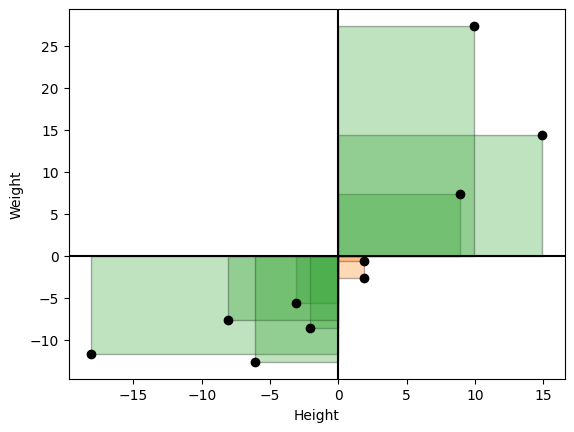

In [ ]:
# 공분산의 그림 표현
# :                +------------------+
# :                |                  |
# :              height               |
# :                |                  |
# :               (xy)---- width -----+
# (xy, w, h)
from matplotlib.patches import Rectangle

fig = plt.figure(dpi=100)
ax = plt.axes()

X_bar = X.mean(axis=0)
print(X_bar)
# 평균을 뺀 편차
X_tilde = X - X_bar

#          0:-   1:+
colors = ['C1', 'C2']

covs = [ Rectangle( (0,0), x[0], x[1], edgecolor='k',
                   facecolor=colors[((x[0]*x[1])>0).astype(int)], alpha=0.3)
            for x in X_tilde ]

for cov in covs:
    ax.add_patch(cov)
ax.plot(X_tilde[:,0], X_tilde[:,1], 'o', color='k')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')

plt.show()

In [ ]:
# 공분산 직접 계산, X_tilde는 편차
np.sum(X_tilde[:,0] * X_tilde[:,1]) / (X_tilde.shape[0])

92.94000000000001

In [ ]:
# 공분산행렬, default ddof=1
np.cov(X[:,0], X[:,1], ddof=0)

array([[ 85.09,  92.94],
       [ 92.94, 147.64]])

## 상관계수

In [ ]:
# 위 데이터의 상관계수
np.corrcoef(X.T)

array([[1.      , 0.829204],
       [0.829204, 1.      ]])

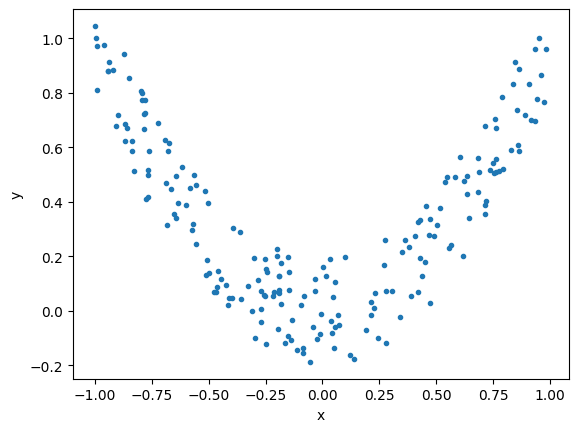

In [ ]:
# 직선의 상관성이 없는 데이터

x = np.random.uniform(-1, 1, 200)
X_uncorr = np.array( [x, x**2 + np.random.uniform(-0.2, 0.2, 200)]).T

fig = plt.figure()
ax = plt.axes()

ax.plot(X_uncorr[:,0], X_uncorr[:,1], '.')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [ ]:
print(np.corrcoef(X_uncorr.T))


[[ 1.         -0.02566704]
 [-0.02566704  1.        ]]


## 2차원 데이터의 시각화

### 산점도

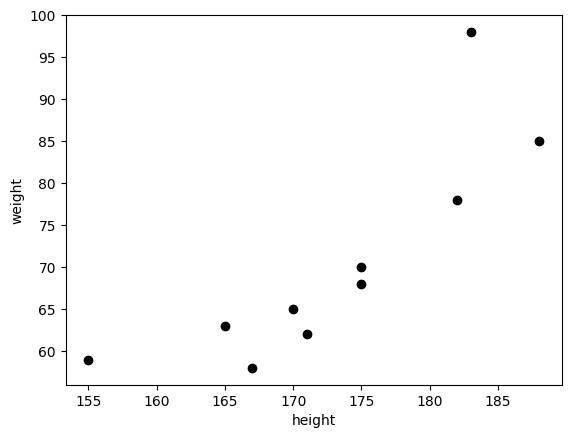

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.plot(X[:,0], X[:,1], 'o', color='k')
ax.set_xlabel('height')
ax.set_ylabel('weight')

plt.show()

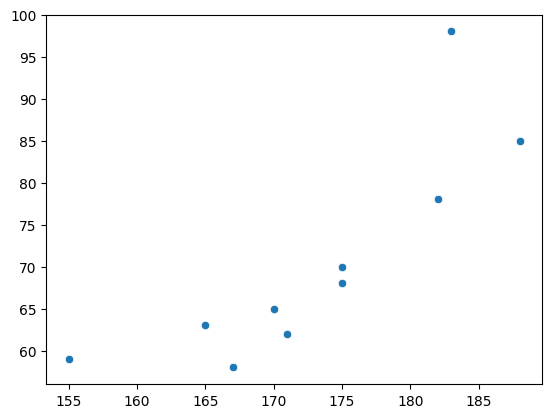

In [ ]:
sns.scatterplot(data=X, x=X[:,0], y=X[:,1])
plt.show()

### 히트맵

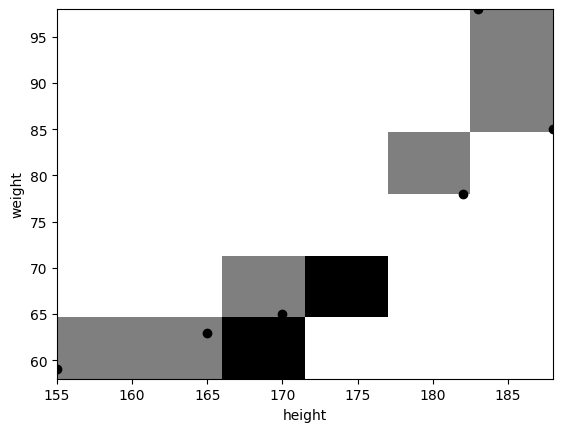

In [ ]:
# matplotlib으로 일종의 2d 히스토그램
fig = plt.figure()
ax = plt.axes()

ax.hist2d(X[:,0], X[:,1], bins=(6,6), cmap='binary')
ax.plot(X[:,0], X[:,1], 'o', color='k')
ax.set_xlabel('height')
ax.set_ylabel('weight')

plt.show()

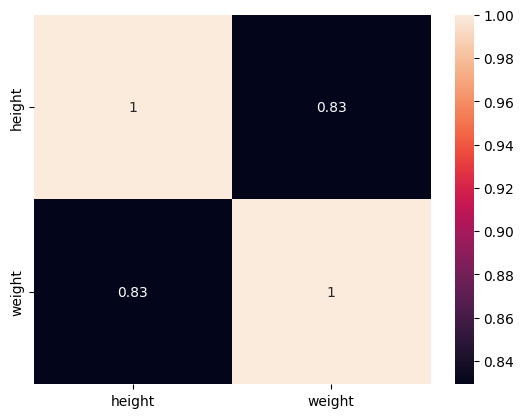

In [ ]:
# seaboarn으로 상관 관계를 히트맵으로
sns.heatmap(np.corrcoef(X.T),
            xticklabels=['height', 'weight'],
            yticklabels=['height', 'weight'],
            annot=True)

plt.show()

#### 히트맵을 이용한 상관관계 분석

In [ ]:
!gdown 1z6WApewnOkuzx3J7esyqeNH6G-tQQ59w

Downloading...
From: https://drive.google.com/uc?id=1z6WApewnOkuzx3J7esyqeNH6G-tQQ59w
To: /content/auto-mpg.data-original
100% 32.1k/32.1k [00:00<00:00, 42.7MB/s]


In [ ]:
col_names = ['mpg','cylinders','displacement','horsepower',
             'weight','acceleration','model year','origin','car name']

In [ ]:
df_origin = pd.read_csv('auto-mpg.data-original',
                        sep="\s+", header=None, names=col_names)

df_origin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
df_origin[['mpg', 'horsepower', 'weight', 'acceleration']].corr()

,mpg,horsepower,weight,acceleration
mpg,1.000000,-0.778427,-0.831741,0.420289
horsepower,-0.778427,1.000000,0.866586,-0.697124
weight,-0.831741,0.866586,1.000000,-0.430086
acceleration,0.420289,-0.697124,-0.430086,1.000000


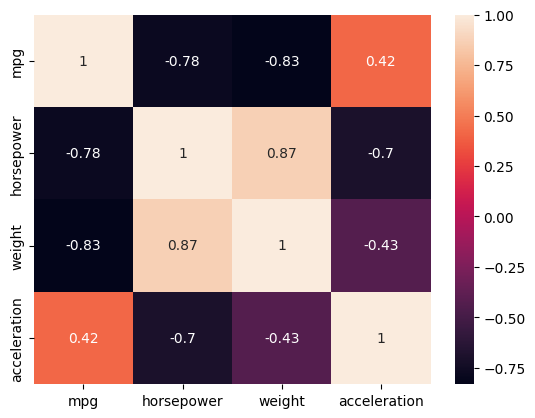

In [ ]:
# mpg, horsepower, weight, acceleration간의 상관계수 시각화
sns.heatmap(data=df_origin[['mpg', 'horsepower', 'weight', 'acceleration']].corr(),
            annot=True)
plt.show()

- `mpg`와 `horsepower`, `weight`은 강한 음의 상관관계: `horsepower`과 `weight`이 늘어나면 연비는 줄어든다

- `horsepower`와 `weight`사이에는 강한 양의 상관관계: `horsepower`가 증가하면 `weight`도 증가한다.

# 확률 시뮬레이션

- 주사위 던지기 시뮬레이션

In [ ]:
# 공평한 주사위
P = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

N = 1000000
samples = np.random.choice([1,2,3,4,5,6], N, p=P)

In [ ]:
sum(samples == 1)

166581

In [ ]:
# 샘플로 부터 구한 확률과 P를 비교
P_stat = np.array([ sum(samples == i) / N for i in range(1, 7) ])

In [ ]:
np.abs(P-P_stat)

array([8.56666667e-05, 4.57666667e-04, 2.51666667e-04, 3.73333333e-04,
       1.23333333e-04, 2.98333333e-04])

In [ ]:
# 공평하지 않은 주사위
P = np.array([1/6, 1/6, 1/6, 1/6, 3/15, 2/15])
print(sum(P))

N = 1000000
samples = np.random.choice([1,2,3,4,5,6], N, p=P)

1.0


In [ ]:
# 샘플로 부터 구한 확률과 P를 비교
P_stat = np.array([ sum(samples == i) / N for i in range(1, 7) ])
np.abs(P-P_stat)

array([3.29333333e-04, 3.65333333e-04, 1.04666667e-03, 1.07333333e-04,
       2.46000000e-04, 1.33333333e-06])

# 결합확률? 조건부확률

## 예제 1: 제비뽑기 시뮬레이션

In [ ]:
# 1: 당첨, 0: 꽝
yoon_pick = []
gun_pick = []

N = 10000 # 뽑기 시도 횟수

for i in range(N):
    lots = [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    idx = random.choice(range(len(lots))) # 윤경이 제비뽑기
    yoon_pick.append( lots[idx] )

    del lots[idx] # 뽑았으면 0번 제비 제거

    idx = random.choice(range(len(lots)))
    gun_pick.append( lots[idx] )

In [ ]:
sum(yoon_pick) / len(yoon_pick), sum(gun_pick) / len(gun_pick)

(0.2038, 0.2069)

# 이산 확률변수

## 확률함수와 누적분포함수

- 각 주사위 눈에 다음처럼 확률이 할당된 불공정한 주사위

| 눈 | 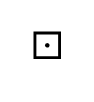 | 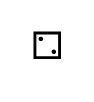 | 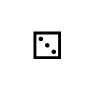 | 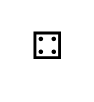 | 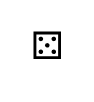 | 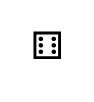 |
|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
| 확률   | $\dfrac{1}{21}$   | $\dfrac{2}{21}$   | $\dfrac{3}{21}$  |$\dfrac{4}{21}$  | $\dfrac{5}{21}$   | $\dfrac{6}{21}$   |

- 샘플을 입력으로 받고 숫자를 출력하는 확률 변수를 다음처럼 정의

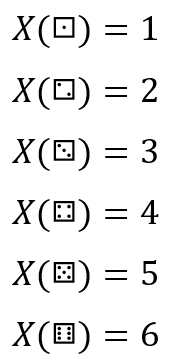



- 그러면 확률 변수 값과 확률의 대응 관계 테이블은 다음처럼 됨

| 눈수 X | 1 | 2 | 3 | 4 | 5 | 6 |
|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
| 확률   | $\dfrac{1}{21}$   | $\dfrac{2}{21}$   | $\dfrac{3}{21}$  |$\dfrac{4}{21}$  | $\dfrac{5}{21}$   | $\dfrac{6}{21}$   |

- 확률 질량함수

$$
f_X(x) = \begin{cases}
\dfrac{x}{21} & x \in \{1,2,3,4,5,6\} \\[10pt]
0 & \mbox{otherwise }
\end{cases}
$$

In [ ]:
# 파이썬으로 확률 변수 정의
# 확률변수가 가질 수 있는 값(support), 일종의 정의역
x_set = np.array([1,2,3,4,5,6])

# 확률 질량 함수
def f_X(x):
    if x in x_set:
        return x / 21
    else:
        return 0

# 확률변수는 x_set과 f(x)로 정의
X = [x_set, f_X]

In [ ]:
# 각 확률 변수값에 대한 확률을 계산
f_X(0), f_X(1), f_X(2), f_X(3), f_X(4), f_X(5), f_X(6), f_X(7)

(0,
 0.047619047619047616,
 0.09523809523809523,
 0.14285714285714285,
 0.19047619047619047,
 0.23809523809523808,
 0.2857142857142857,
 0)

In [ ]:
[f_X(xi) for xi in x_set]

[0.047619047619047616,
 0.09523809523809523,
 0.14285714285714285,
 0.19047619047619047,
 0.23809523809523808,
 0.2857142857142857]

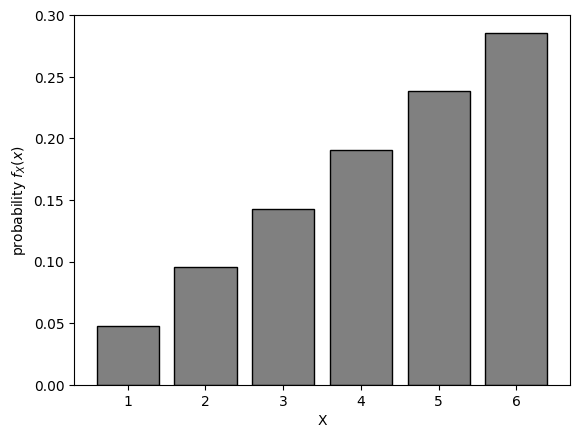

In [ ]:
# 모두 계산
prob = np.array([f_X(xi) for xi in x_set])

# 확률을 막대그래프로 표시
plt.bar(x_set, prob, color='gray', ec='k')
plt.xlabel('X')
plt.ylabel('probability ' + r'$f_X(x)$')
plt.show()

In [ ]:
np.all([True, True, False])

prob >= 0

array([ True,  True,  True,  True,  True,  True])

In [ ]:
# 확률의 성질 확인

# 모두 0 이상인가?
print( np.all(prob >= 0) ) # np.all() 모두 1이어야 결과는 1


# 더 더해서 1이 되나?
np.sum(prob)

True


0.9999999999999999

In [ ]:
# 누적 분포함수
def F(x):
    return np.sum([f_X(xi) for xi in x_set if xi <= x])

F(1), F(1.2), F(2)

(0.047619047619047616, 0.047619047619047616, 0.14285714285714285)

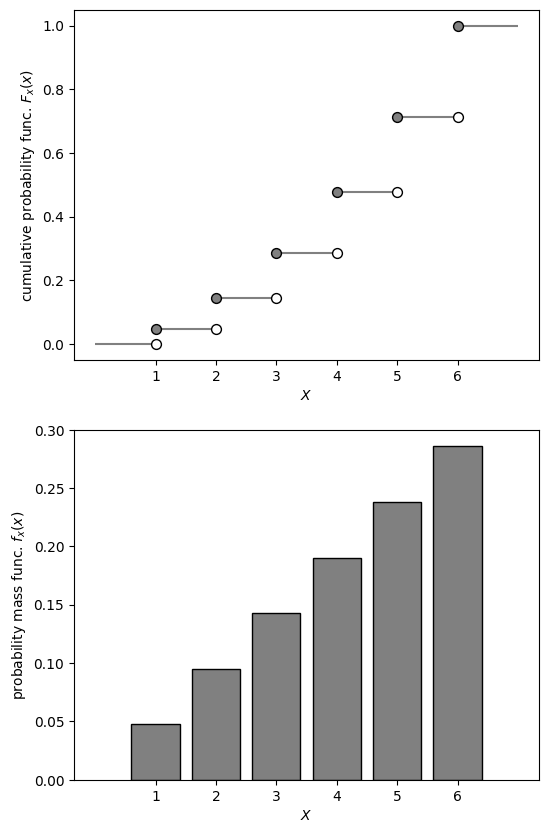

In [ ]:
# 그림
fig, ax = plt.subplots(figsize=(6, 10), nrows=2, ncols=1, sharex=True)

interval = [0] + list(x_set) + [7]
interval = [(interval[i], interval[i+1]) for i in range(len(interval)-1)]

cumprob = [0.] + [F(xi) for xi in x_set]

for i, unit in enumerate(interval):
    if i == 0:
        ax[0].hlines(0, unit[0], unit[1], color='gray')
        ax[0].scatter([unit[1]],[0], s=50, c='w', edgecolors='k', zorder=10)
    elif i == len(interval)-1:
        ax[0].hlines(1, unit[0], unit[1], color='gray')
        ax[0].scatter([unit[0]], [cumprob[i]], s=50, c='gray', edgecolors='k', zorder=10)
    else:
        ax[0].hlines(cumprob[i], unit[0], unit[1], color='gray')
        ax[0].scatter([unit[0]], [cumprob[i]], s=50, c='gray', edgecolors='k', zorder=10)
        if i <= len(interval)-2:
            ax[0].scatter([unit[1]], [cumprob[i]], s=50, c='w', edgecolors='k', zorder=10)

ax[0].set_xlabel(r'$X$')
ax[0].set_ylabel('cumulative probability func. ' + r'$F_x(x)$')
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].xaxis.set_tick_params(which='both', labelbottom=True)

# 모두 계산
prob = np.array([f_X(xi) for xi in x_set])

# 확률을 막대그래프로 표시
ax[1].bar(x_set, prob, color='gray', ec='k')

ax[1].set_xlabel(r'$X$')
ax[1].set_ylabel('probability mass func. ' + r'$f_x(x)$')
ax[1].set_xticks([1, 2, 3, 4, 5, 6])

plt.show()

## 기댓값

$$
\mathbb{E}[X] = \sum_{i} x_i f_X(x_i)
$$

- 앞서 정의한 확률변수의 기댓값





In [ ]:
# 확률변수 X의 이론적 기댓값
np.sum([xi * f_X(xi) for xi in x_set])

4.333333333333333

In [ ]:
# 시뮬레이션
# x_set = np.array([1,2,3,4,5,6])

sample = np.random.choice(x_set, 10000, p = prob)
np.mean(sample)

4.3286

- 임의의 함수 $g()$로 변환된 확률변수의 기댓값

$$
\mathbb{E}[g(X)] = \sum_{i} g(x_i) f_{X}(x_i)
$$

- 로 정의하고 이 경우 앞서 구한 확률변수 $X$의 기댓값은 $g(X)=X$인 항등 함수인 경우

In [ ]:
# 1차원 확률변수의 기댓값
# X = [x_set, f_X]

def E(X, g=lambda x: x):
    x_set, f_X = X
    return np.sum([g(xi)*f_X(xi) for xi in x_set])

In [ ]:
# Z = 2X + 1로 정의된 확률변수의 기댓값
E(X), E(X, lambda x: 2*x+1), 2*E(X)+1

(4.333333333333333, 9.666666666666666, 9.666666666666666)

## 분산

$$
Var[X] = \sum_i (x_i - \mathbb{E}[X])^2 f_X(x_i)
$$

- 임의의 함수 $g()$로 변환된 확률변수의 분산

$$
Var[g(X)] = \sum_i (g(x_i)-\mathbb{E}[g(X)])^2 f_{X}(x_i)
$$



In [ ]:
m = E(X)
np.sum([(xi-m)**2 * f_X(xi) for xi in x_set])

2.2222222222222223

In [ ]:
# 1차원 확률변수의 분산
def Var(X, g=lambda x: x):
    x_set, f_X = X
    m = E(X, g)
    return np.sum([(g(xi)-m)**2 * f_X(xi) for xi in x_set])

In [ ]:
Var(X), Var(X, lambda x: 2*x+3), 2**2 * Var(X)

(2.2222222222222223, 8.88888888888889, 8.88888888888889)

# 2차원 이산 확률변수

## 결합확률분포

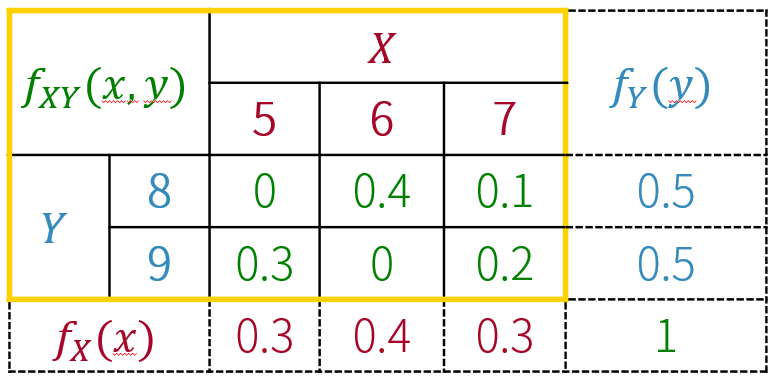

In [ ]:
x_set = np.arange(5, 8)
y_set = np.arange(8, 10)

In [ ]:
# joint
def f_XY(x, y):
    mass = {
        (5,8): 0.0, (6,8): 0.4, (7,8):0.1,
        (5,9): 0.3, (6,9): 0.0, (7,9):0.2
    }
    if 5<=x<=7 and 8<=y<=9:
        return mass[(x,y)]
    else:
        return 0

In [ ]:
# 결합확률변수 XY 또는 확률벡터 XY
XY = [x_set, y_set, f_XY]

In [ ]:
# 확률의 성질 확인
prob = np.array([f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

np.all(prob >= 0), np.sum(prob)

(True, 1.0)

## 주변확률분포

- 확률의 합법칙에 의한 변수 제거, 주변화marginalization

$$
f_X(x) = \sum_j f_{XY}(x, y_j)
$$

- $f_X(x)$: 주변 확률 분포marginal probability distribution

In [ ]:
# marginal
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [ ]:
f_X(5), f_X(6), f_X(7)

(0.3, 0.4, 0.30000000000000004)

In [ ]:
f_Y(8), f_Y(9)

(0.5, 0.5)

In [ ]:
# 주변화된 X, Y를 확률변수로 재정의
X = [x_set, f_X]
Y = [y_set, f_Y]

## 예제 2: 불량품 시뮬레이션

A공장 60%, B공장 30%, C공장 10% 생산에 불량률은 각 1%, 2%, 3%일 때 차를 샀을 때 불량이 걸릴 확률을 계산하시오.

$$
P(A) = \frac{60}{100}, \quad P(B)=\frac{30}{100}, \quad P(C)=\frac{10}{100}
$$

$$
P(D \mid A) = \frac{1}{100}, \quad P(D \mid B)=\frac{2}{100}, \quad P(D \mid C)=\frac{3}{100}
$$


In [ ]:
factories = ['A', 'B', 'C']
N = 1000000

# 공장을 무작위로 선택
fs = random.choices(factories, weights=(0.6, 0.3, 0.1), k=N)

In [ ]:
defective_rate = {'A':(0.99, 0.01), 'B':(0.98,0.02), 'C':(0.97,0.03)}
# 'pass', 'fail'
# ('A', 'fail')
cars = [( f, random.choices(['pass', 'fail'], defective_rate[f])[0] ) for f in fs]

In [ ]:
fail = 0
A = 0
A_fail = 0

B = 0
B_fail = 0

C = 0
C_fail = 0

for car in cars:
    is_fail = False

    if car[1] == 'fail':
        fail += 1
        is_fail = True

    if car[0] == 'A':
        A += 1
        if is_fail == True:
            A_fail += 1

    elif car[0] == 'B':
        B += 1
        if is_fail == True:
            B_fail += 1
    else:
        C += 1
        if is_fail == True:
            C_fail += 1


print(f"P(A)={A/N:.4f}, P(F|A)={A_fail/A:.4f}, P(B)={B/N:.4f}, P(F|B)={B_fail/B:.4f}, P(C)={C/N:.4f}, P(F|C)={C_fail/C:.4f}, P(F)={fail/N:.4f}")

P(A)=0.6000, P(F|A)=0.0101, P(B)=0.3005, P(F|B)=0.0198, P(C)=0.0996, P(F|C)=0.0299, P(F)=0.0150


## $X$, $Y$의 기댓값

$$
\mathbb{E}[X] = \sum_i \sum_j x_i f_{XY}(x_i, y_j)
$$

In [ ]:
# X의 기댓값
np.sum([x_i*f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

6.000000000000001

$$
\mathbb{E}[Y] = \sum_i \sum_j y_j f_{XY}(x_i, y_j)
$$

In [ ]:
# Y의 기댓값
np.sum([y_j*f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.5

- 일반적으로 다음처럼 정의

$$
\mathbb{E}[g(X,Y)]  = \sum_i \sum_j g(x_i, y_j) f_{XY}(x_i, y_j)
$$

- $\mathbb{E}[X]$는 $g(X, Y)=X$인 경우, $\mathbb{E}[Y]$는 $g(X,Y)=Y$인 경우

In [ ]:
# 2차원 확률변수의 기댓값
# 한번에 한 변수에 대한 기댓값만 구함
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum(
        [g(x_i, y_j)*f_XY(x_i, y_j) for x_i in x_set for y_j in y_set]
    )

In [ ]:
E(XY, lambda x,y: x), E(XY, lambda x,y: y)

(6.000000000000001, 8.5)

- 주변 확률분포로 구한 기댓값

$$
\mathbb{E}[X] = \sum_i x_i f_X(x_i)
$$

$$
\mathbb{E}[Y] = \sum_j y_j f_X(y_j)
$$

In [ ]:
np.sum([x_i*f_X(x_i) for x_i in x_set]), np.sum([y_j*f_Y(y_j) for y_j in y_set])

(6.000000000000001, 8.5)

- 조건부 확률 분포로 구한 기댓값(Iterative Expectations, The Low of Total Expectations)

$$
\mathbb{E}[X] = \mathbb{E}_Y[\mathbb{E}_{X|Y}[X|Y]]
$$

In [ ]:
def f_X_bar_Y(x, *, y):
    return f_XY(x, y) / f_Y(y)

# y=9라는 조건하에서 x에 대한 확률 분포를 이룸
f_X_bar_Y(5, y=9) + f_X_bar_Y(6, y=9) + f_X_bar_Y(7, y=9)

1.0

In [ ]:
# E[X] = E_Y[E_X|Y[X|Y]]
np.array([
    np.sum([
        x_i*f_X_bar_Y(x_i, y=y_j)
        for x_i in x_set
    ])*f_Y(y_j) for y_j in y_set
]).sum()

6.000000000000001

$$
\mathbb{E}[Y] = \mathbb{E}_X[\mathbb{E}_{Y|X}[Y|X]]
$$

In [ ]:
def f_Y_bar_X(y, *, x):
    return f_XY(x, y) / f_X(x)

# x=5라는 조건하에서 x에 대한 확률 분포를 이룸
f_Y_bar_X(8, x=5) + f_Y_bar_X(9, x=5)

1.0

In [ ]:
# E[Y] = E_X[E_Y|X[Y|X]]
np.array([
    np.sum([
        y_j*f_Y_bar_X(y_j, x=x_i)
        for y_j in y_set
    ])*f_X(x_i) for x_i in x_set
]).sum()

8.5

## $X$, $Y$의 분산과 $XY$의 공분산

In [ ]:
def Var(XY, g):
    # g는 g(X, Y)로 스칼라 함수
    x_set, y_set, f_XY = XY
    m = E(XY, g)

    return np.sum(
        [(g(x_i,y_j)-m)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set]
    )

In [ ]:
Var(XY, lambda x, y: x), Var(XY, lambda x,y: y)

(0.6, 0.25)

In [ ]:
# E[X]를 이용한 Var[X]의 다른 표현

E(XY, lambda x, y: x**2) - E(XY, lambda x, y: x)**2

0.5999999999999801

In [ ]:
# E[Y]를 이용한 Var[Y]의 다른 표현

E(XY, lambda x, y: y**2) - E(XY, lambda x, y: y)**2

0.25

In [ ]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    m_X = E(XY, lambda x, y: x)
    m_Y = E(XY, lambda x, y: y)

    return np.sum(
        [(x_i-m_X)*(y_j-m_Y)*f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set]
    )

In [ ]:
Cov(XY)

-0.1

In [ ]:
# Cov(XY) 다른 표현

E(XY, lambda x, y: x*y) - E(XY, lambda x, y: x)*E(XY, lambda x, y: y)

-0.10000000000000142

## 기댓값, 분산 시뮬레이션

In [ ]:
# 시뮬레이션 할려면 2차원 변수의 샘플링이 되야 되므로
# "x,y" 형태의 샘플을 만들고
xy_set = [f"{x},{y}" for x in x_set for y in y_set]
print('xy_set:', xy_set)

# 샘플을 쪼개서 숫자로 만드는 함수를 만들어
# 어레이에 적용할 수 있게 변환한 다음
to_sample = lambda x: map(int, x.split(','))
vfunc = np.vectorize(to_sample)

# 샘플링하고
samples = np.random.choice(
    xy_set, size=10000,
    p=(0.0, 0.3, 0.4, 0.0, 0.1, 0.2)
)

# (N,2)의 어레이로 만든 다음
foo = np.array(list(map(list, vfunc(samples))))
print(foo)

# 분산, 공분산을 구해봄
np.cov(foo.T)

xy_set: ['5,8', '5,9', '6,8', '6,9', '7,8', '7,9']
[[5 9]
 [7 9]
 [6 8]
 ...
 [6 8]
 [6 8]
 [5 9]]


array([[ 0.60105995, -0.10380918],
       [-0.10380918,  0.250016  ]])